In [57]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [58]:
# Import Weather Datset
weather_data = pd.read_csv('data\input\wundergound.csv')
weather_data

,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip,Condition
0,2022-01-01,11:15:00,33,28,82,NNE,21.0,31.0,29.17,0.0,Light Snow / Windy
1,2022-01-01,11:29:00,32,27,82,NNE,22.0,31.0,29.17,0.0,Light Snow / Windy
2,2022-01-01,11:53:00,32,27,82,NNE,21.0,33.0,29.18,0.0,Light Snow / Windy
3,2022-01-01,12:00:00,32,28,85,NNE,22.0,31.0,29.18,0.0,Light Snow / Windy
4,2022-01-01,12:10:00,32,28,85,NNE,21.0,29.0,29.17,0.0,Light Snow / Windy
...,...,...,...,...,...,...,...,...,...,...,...
10189,2022-12-31,13:53:00,37,30,76,SE,9.0,18.0,29.23,0.0,Cloudy
10190,2022-12-31,14:53:00,37,31,79,SE,10.0,NaN,29.21,0.0,Cloudy
10191,2022-12-31,15:53:00,37,32,82,CALM,0.0,NaN,29.22,0.0,Cloudy
10192,2022-12-31,16:53:00,37,32,82,SE,6.0,NaN,29.22,0.0,Cloudy


In [59]:
#attribute types
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         10194 non-null  object 
 1   Time         10194 non-null  object 
 2   Temperature  10194 non-null  int64  
 3   Dew Point    10194 non-null  int64  
 4   Humidity     10194 non-null  int64  
 5   Wind         10188 non-null  object 
 6   Wind Speed   10188 non-null  float64
 7   Wind Gust    2732 non-null   float64
 8   Pressure     10194 non-null  float64
 9   Precip       10194 non-null  float64
 10  Condition    10194 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 876.2+ KB


In [60]:
# Kombiniere "Date" und "Time" und speichere das Ergebnis in der Spalte "DateTime"
weather_data['DateTime'] = pd.to_datetime(weather_data['Date'] + ' ' + weather_data['Time'], format='%Y-%m-%d %H:%M:%S')

# Setze den Index des DataFrames auf die Spalte "DateTime"
weather_data_indexed_by_date = weather_data.set_index('DateTime')

# Ausgabe des aktualisierten DataFrame mit der neuen Spalte
print(weather_data)

             Date      Time  Temperature  Dew Point  Humidity  Wind  \
0      2022-01-01  11:15:00           33         28        82   NNE   
1      2022-01-01  11:29:00           32         27        82   NNE   
2      2022-01-01  11:53:00           32         27        82   NNE   
3      2022-01-01  12:00:00           32         28        85   NNE   
4      2022-01-01  12:10:00           32         28        85   NNE   
...           ...       ...          ...        ...       ...   ...   
10189  2022-12-31  13:53:00           37         30        76    SE   
10190  2022-12-31  14:53:00           37         31        79    SE   
10191  2022-12-31  15:53:00           37         32        82  CALM   
10192  2022-12-31  16:53:00           37         32        82    SE   
10193  2022-12-31  17:53:00           37         32        82   ESE   

       Wind Speed  Wind Gust  Pressure  Precip           Condition  \
0            21.0       31.0     29.17     0.0  Light Snow / Windy   
1      

In [61]:
#attribute types
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         10194 non-null  object        
 1   Time         10194 non-null  object        
 2   Temperature  10194 non-null  int64         
 3   Dew Point    10194 non-null  int64         
 4   Humidity     10194 non-null  int64         
 5   Wind         10188 non-null  object        
 6   Wind Speed   10188 non-null  float64       
 7   Wind Gust    2732 non-null   float64       
 8   Pressure     10194 non-null  float64       
 9   Precip       10194 non-null  float64       
 10  Condition    10194 non-null  object        
 11  DateTime     10194 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 955.8+ KB


In [62]:
#check for null values
weather_data.isnull().sum()

Date              0
Time              0
Temperature       0
Dew Point         0
Humidity          0
Wind              6
Wind Speed        6
Wind Gust      7462
Pressure          0
Precip            0
Condition         0
DateTime          0
dtype: int64

In [63]:
# Spalten "Time" und "Date" löschen
weather_data.drop(['Time', 'Date'], axis=1, inplace=True)

In [64]:
#check for null values
weather_data.isnull().sum()

Temperature       0
Dew Point         0
Humidity          0
Wind              6
Wind Speed        6
Wind Gust      7462
Pressure          0
Precip            0
Condition         0
DateTime          0
dtype: int64

In [65]:
# Überprüfe auf doppelte Einträge in der Spalte "DateTime"
duplicates = weather_data[weather_data['DateTime'].duplicated(keep=False)]

# Ausgabe der doppelten Einträge der Spalte "DateTime"
print(duplicates['DateTime'])

8336   2022-10-30 02:53:00
8337   2022-10-30 02:53:00
Name: DateTime, dtype: datetime64[ns]


In [66]:
# Lösche die doppelten Einträge
weather_data.drop_duplicates(subset='DateTime', inplace=True)

In [69]:
#check if there are duplicate entries
weather_data[weather_data.duplicated()]

,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip,Condition,DateTime


In [70]:
def drop_non_binary_precip_rows(df):
    non_binary_rows = ~((df['Precip'] == 0) | (df['Precip'] == 1))
    return df.drop(df[non_binary_rows].index)

weather_data = drop_non_binary_precip_rows(weather_data)

In [71]:
def check_binary_precip_values(df):
    return (df['Precip'] == 0) | (df['Precip'] == 1)

is_binary = check_binary_precip_values(weather_data).all()

print("Ist jede Zeile der Spalte 'Precip' binär?", is_binary)

Ist jede Zeile der Spalte 'Precip' binär? True


In [72]:
start = weather_data['DateTime'].min()
print("Earliest date entry:", start)
end = weather_data['DateTime'].max()
print("Latest date entry:", end)

Earliest date entry: 2022-01-01 11:15:00
Latest date entry: 2022-12-31 17:53:00


In [73]:
date_range = pd.date_range(start, end, freq = 'H')

#for faster lookup
def get_missing_dates():
    out = []
    weather_data_indexed_by_date = weather_data.set_index('DateTime')

    for date in date_range:
        try:
           weather_data_indexed_by_date.loc[date.strftime('%Y-%m-%d %H:%M:%S'),]
        except KeyError:
            out.append(date)
    return out
missing_dates = get_missing_dates()
len(missing_dates)

8712

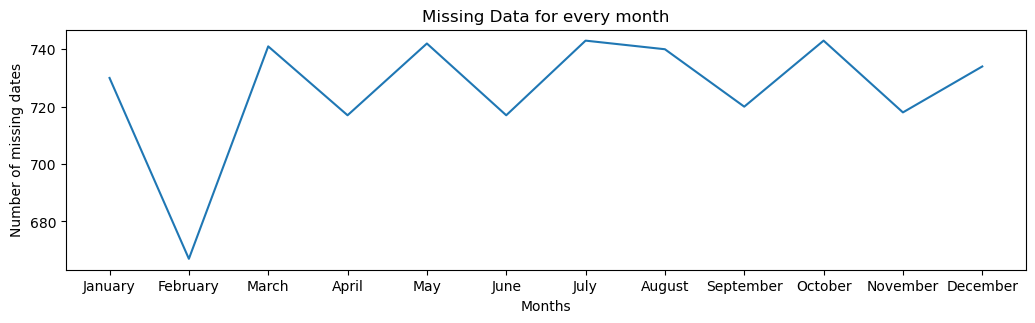

In [74]:
months = {'January': 0, 'February': 0, 'March': 0, 'April': 0, 
          'May': 0, 'June': 0, 'July': 0, 'August': 0, 
          'September': 0, 'October': 0, 'November': 0, 'December': 0}

for date in missing_dates:
    months[date.month_name()] = months[date.month_name()] + 1

Fig = plt.figure()
ax = Fig.add_axes([0.5, 0.5, 1.5, 0.5])
ax.plot(months.keys(), months.values())
ax.set_xlabel('Months')
ax.set_ylabel('Number of missing dates')
ax.set_title('Missing Data for every month')
plt.show()

In [75]:
min_temperature = weather_data["Temperature"].min()
print("Minium temperature:", min_temperature, "Fahrenheit")

max_temperature = weather_data["Temperature"].max()
print("Minium temperature:", max_temperature, "Fahrenheit")

Minium temperature: -9 Fahrenheit
Minium temperature: 101 Fahrenheit


In [76]:
min_Wind_Speed = weather_data["Wind Speed"].min()
print("Minium Wind Speed:", min_Wind_Speed, "mph")

max_Wind_Speed = weather_data["Wind Speed"].max()
print("Max Wind Speed:", max_Wind_Speed, "mph")

Minium Wind Speed: 0.0 mph
Max Wind Speed: 37.0 mph


In [77]:
min_Pressure = weather_data["Pressure"].min()
print("Minium Pressure:", min_Pressure)

max_Pressure = weather_data["Pressure"].max()
print("Max Pressure:", max_Pressure)

Minium Pressure: 28.48
Max Pressure: 29.97


In [78]:
weather_data.to_csv('C:\\Users\\OGSKNECH\\AAA\\aaa\\data\\input\\weather_data_2022.csv', index=False)
